## Loading data from the simulation output - the automatic way

This notebook teaches you how to load data from the simulation output using a helper tool.

We will use the data from the simulation in the quickstart example, so make sure you ran this beforehand.

We'll first create a Data object and ask what's available in the output. 

In [1]:
from fargocpt import Loader
l = Loader("example_dirs/100_quickstart/output/out")
l

   Loader
| output_dir: example_dirs/100_quickstart/output/out
| snapshots: 0 ... 10
| special_snapshots: ['reference']
| snapshot_time: 0.0 5.02257e+06 s ... 62.8 5.02257e+06 s
| monitor_number: 0 ... 200
| units: Units
| target_units = None
| gas: Hydro
| nbody: Nbody
| params: Params
| particles = None

We can explore this data object further by looking at some of its member variables.

In [2]:
l.nbody

[   Nbody
 | filepath: 100_quickstart/output/out/monitor/nbody0.dat
 | varnames:
 |   time
 |   snapshot_number
 |   monitor_number
 |   x
 |   y
 |   vx
 |   vy
 |   mass
 |   physical_time
 |   omega_frame
 |   mdcp
 |   eccentricity
 |   angular_momentum
 |   semi_major_axis
 |   omega_kepler
 |   mean_anomaly
 |   eccentric_anomaly
 |   true_anomaly
 |   pericenter_angle
 |   torque
 |   accreted_mass
 |   accretion_rate
 ====================,
    Nbody
 | filepath: 100_quickstart/output/out/monitor/nbody1.dat
 | varnames:
 |   time
 |   snapshot_number
 |   monitor_number
 |   x
 |   y
 |   vx
 |   vy
 |   mass
 |   physical_time
 |   omega_frame
 |   mdcp
 |   eccentricity
 |   angular_momentum
 |   semi_major_axis
 |   omega_kepler
 |   mean_anomaly
 |   eccentric_anomaly
 |   true_anomaly
 |   pericenter_angle
 |   torque
 |   accreted_mass
 |   accretion_rate
 ====================]

In [3]:
l.gas

   Hydro
| output_dir: 100_quickstart/output/out
| units: Units
| target_units= None
| grid: Grid
| timestepping: Scalar
| scalars: Scalar
| vars1D: Vars1D
| vars2D: Vars2D

In [4]:
l.units

   Units
| base:
|   length: 1.49598e+13 cm
|   time: 5.02257e+06 s
|   mass: 1.98847e+33 g
|   temperature: 106700 K
|  derived:
|   energy: 1.76408e+46 erg
|   energy surface density: 7.88257e+19 erg / cm2
|   density: 5.9394e-07 g / cm3
|   mass surface density: 8.88522e+06 g / cm2
|   opacity: 1.12546e-07 cm2 / g
|   energy flux: 1.56943e+13 erg / (s cm2)
|   velocity: 2.97851e+06 cm / s
|   angular momentum: 8.86021e+52 cm2 g / s
|   kinematic viscosity: 4.45579e+19 cm2 / s
|   dynamic viscosity: 2.64648e+13 P
|   acceleration: 0.593026 cm / s2
|   stress: 7.88257e+19 g / s2
|   pressure: 7.88257e+19 dyn / cm
|   power: 3.51231e+39 erg / s
|   potential: 8.87155e+12 erg / g
|   torque: 1.76408e+46 erg
|   force: 1.17921e+33 dyn
|   mass accretion rate: 3.95907e+26 g / s

To see all at once, run the following cell.

In [5]:
l.print(recursive=True)

   Loader
| output_dir: 100_quickstart/output/out
| snapshots: 0 ... 10
| special_snapshots: ['reference']
| snapshot_time: 0.0 5.02257e+06 s ... 62.8 5.02257e+06 s
| monitor_number: 0 ... 200
| units: Units
| target_units = None
| gas: Hydro
| nbody: Nbody
| params: Params
| particles = None

|      Units
|   ====================
|   | base:
|   |   length: 1.49598e+13 cm
|   |   time: 5.02257e+06 s
|   |   mass: 1.98847e+33 g
|   |   temperature: 106700 K
|   |  derived:
|   |   energy: 1.76408e+46 erg
|   |   energy surface density: 7.88257e+19 erg / cm2
|   |   density: 5.9394e-07 g / cm3
|   |   mass surface density: 8.88522e+06 g / cm2
|   |   opacity: 1.12546e-07 cm2 / g
|   |   energy flux: 1.56943e+13 erg / (s cm2)
|   |   velocity: 2.97851e+06 cm / s
|   |   angular momentum: 8.86021e+52 cm2 g / s
|   |   kinematic viscosity: 4.45579e+19 cm2 / s
|   |   dynamic viscosity: 2.64648e+13 P
|   |   acceleration: 0.593026 cm / s2
|   |   stress: 7.88257e+19 g / s2
|   |   pressure:

Scalar quantities can be loaded directly by accessing a member:

In [6]:
print(l.gas.scalars.mass[:10])
print(l.nbody[1].x[:10])

[0.00034884 0.00034884 0.00034884 0.00034884 0.00034884 0.00034884
 0.00034884 0.00034885 0.00034885 0.00034886] 1.98847e+33 g
[1.         0.99999997 0.99999969 0.99999872 0.99999644 0.99999217
 0.99998542 0.99997613 0.99996456 0.99995133] 1.49598e+13 cm


We can also use a getter function to do this. See its use below.

In [7]:
print(l.gas.scalars.get("mass")[:10])

[0.00034884 0.00034884 0.00034884 0.00034884 0.00034884 0.00034884
 0.00034884 0.00034885 0.00034885 0.00034886] 1.98847e+33 g


Let's plot some data for the second nbody object, the planet in this case.

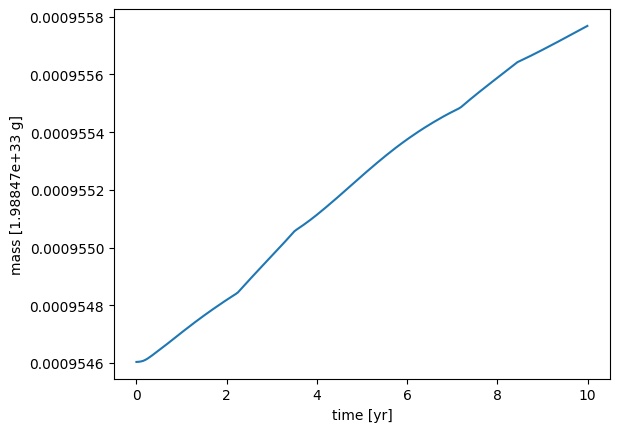

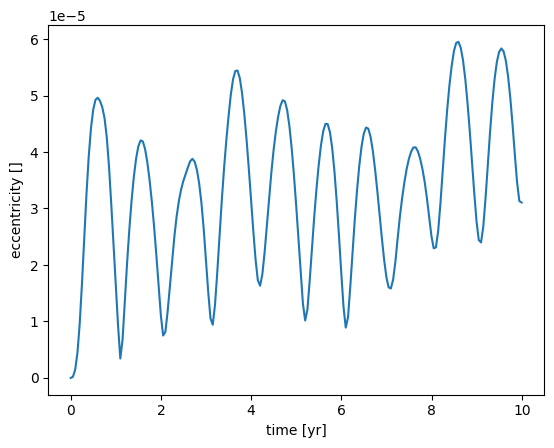

In [8]:
import matplotlib.pyplot as plt

for varname in ["mass", "eccentricity"]:
    fig, ax = plt.subplots()
    x = l.nbody[1].get(varname)
    t = l.nbody[1].time.to("yr")
    ax.plot(t, x)
    ax.set_ylabel(f"{varname} [{x.unit}]")
    ax.set_xlabel(f"time [yr]")

## 2D data

To obtain 2D data for the gas, let's inspect

In [9]:
l.gas

   Hydro
| output_dir: 100_quickstart/output/out
| units: Units
| target_units= None
| grid: Grid
| timestepping: Scalar
| scalars: Scalar
| vars1D: Vars1D
| vars2D: Vars2D

There seems to be a `vars2D` member.

In [10]:
l.gas.vars2D

   Vars2D
| output_dir: 100_quickstart/output/out
| target_units= None
| grid: Grid
| var_names:
|   Sigma
|   vrad
|   vazi
|   energy

And some data is available.
Here, we can't just access the data via member variables, because we need to specify a snaphost number.

In [11]:
R, PHI, vals = l.gas.vars2D.get("Sigma", 5)
print(R.shape, PHI.shape, vals.shape)

(74, 251) (74, 251) (74, 251)


This returns meshgrids for radius and azimuth coordinates and the values as 2D array.

If you want to use this for plotting with pcolormesh, add the following. This returns meshgrids which are 1 cell larger in each direction as needed by plt.pcolormesh.

In [12]:
R, PHI, vals = l.gas.vars2D.get("Sigma", 5, grid_for_plot=True)
print(R.shape, PHI.shape, vals.shape)

(75, 252) (75, 252) (74, 251)


Now in action!

In [13]:
import numpy as np
import matplotlib.colors as mplcolors

def plot_field(loader, name, N, ax=None, dataunit=None, vmin=None, vmax=None, cmap="viridis"):
    R, PHI, vals = loader.gas.vars2D.get(name, N, grid_for_plot=True)
    if dataunit is None:
        dataunit = vals.unit
    Z = vals.to_value(dataunit)

    X = R*np.cos(PHI)
    Y = R*np.sin(PHI)

    if ax is None:
        fig, ax = plt.subplots(dpi=150)
    else:
        fig = ax.get_figure()

    norm = mplcolors.Normalize(vmin=vmin, vmax=vmax)
    pcm = ax.pcolormesh(X,Y,Z, norm=norm, cmap=cmap)
    ax.set_aspect("equal")

    t = loader.snapshot_time[N].to_value("kyr")
    ax.set_title(f" t={t:.2e}kyr, N={N}")

    cbar = fig.colorbar(pcm, ax=ax)
    cbar.set_label(f"{name} [{dataunit}]")
    
    return fig

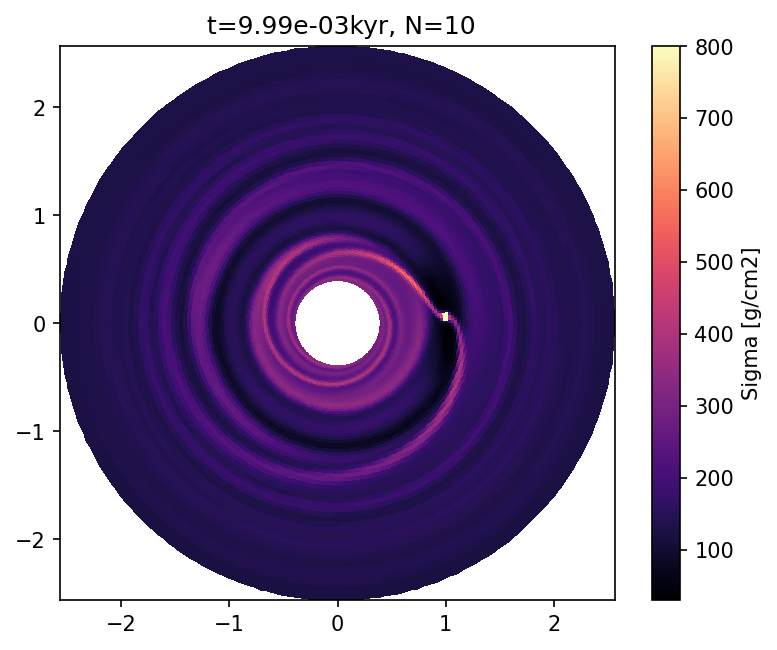

In [14]:
plot_field(l, "Sigma", l.snapshots[-1], dataunit="g/cm2", cmap="magma", vmax=800);

We can also reduce the data to azimuthal averages, minimums or maximums as follows

Text(0, 0.5, '$\\Sigma$ [g/cm2]')

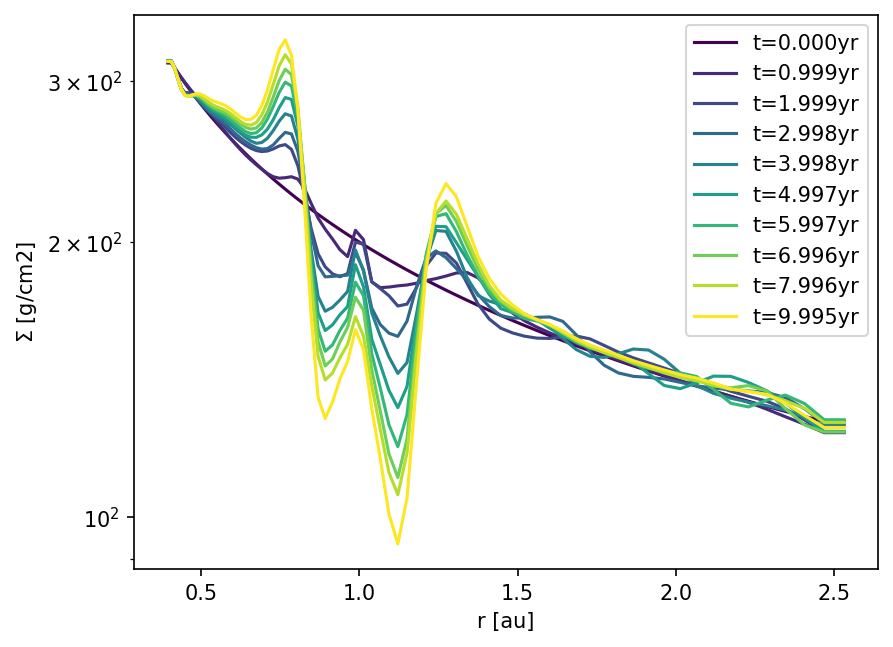

In [15]:
from matplotlib import colormaps

name = "Sigma"
dataunit = "g/cm2"

Nfirst = l.snapshots[0]
Nlast = l.snapshots[-1]


fig, ax = plt.subplots(dpi=150)

cmap = colormaps.get_cmap("viridis")

inds = np.linspace(Nfirst, Nlast, 10, dtype=int)
for k, n in enumerate(inds):
    color = cmap(k/(len(inds)-1))
    
    r, vals = l.gas.vars2D.avg(name, n) # here, we automatically get a grid, i.e. an array of radii
    r = r.to_value("au")
    y = vals.to_value(dataunit)
    
    t = l.snapshot_time[n].to_value("yr")
    # ax.plot(r, (profile-profile0)/profile0, label=f"t={t:.3f}yr")
    line, = ax.plot(r, y, label=f"t={t:.3f}yr", color=color)
    
ax.legend()
ax.set_yscale("log")
ax.set_xlabel("r [au]")
ax.set_ylabel(fr"$\Sigma$ [{dataunit}]")